In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import collections as co

In [166]:
data = pd.read_csv(r"C:\Users\Surface\Desktop\大四下\複雜系統\Coding\Final report\SARS\sars_2003_complete_dataset_clean.csv")

In [167]:
set_Country = set(data["Country"])
list_Country = list(set_Country)
list_data = data.values.tolist() #整個轉為list
print(list_Country)
print(list_data[0])

['India', 'Kuwait', 'Brazil', 'Indonesia', 'Switzerland', 'Mongolia', 'Poland', 'Republic of Ireland', 'Romania', 'China', 'Malaysia', 'France', 'Hong Kong SAR, China', 'South Africa', 'Taiwan, China', 'Canada', 'New Zealand', 'United States', 'Viet Nam', 'Singapore', 'Spain', 'Philippines', 'Macao SAR, China', 'Belgium', 'Sweden', 'Thailand', 'Bulgaria', 'Germany', 'Colombia', 'Republic of Korea', 'Russian Federation', 'Finland', 'Australia', 'Slovenia', 'United Kingdom', 'Italy', 'Japan']
['2003/3/17', 'Germany', 1, 0, 0]


In [168]:
for i in list_Country:
    locals()[str(i) + "_data"] = []
    for j in range(0, len(list_data)):
        if(list_data[j][1] == i):
            locals()[str(i) + "_data"].append([[list_data[j][0]], list_data[j][2:6]])
        
        else:
            pass

In [169]:
nn = 0
print(len(list_Country))
for i in list_Country:
    if (len(locals()[str("{}").format(i) + "_data"]) == 96):
        nn = nn + 1
        print(i)
    else:
        pass
print(nn)

37
China
Hong Kong SAR, China
Canada
Singapore
Thailand
Germany
6


In [170]:
# "China", "Hong Kong SAR, China", "Canada", "Singapore", "Thailand", "Germany"

name = "China"
print(len(locals()[str("{}").format(name) + "_data"]))
print(locals()[str("{}").format(name) + "_data"])
print(locals()[str("{}").format(name) + "_data"][0])
print(locals()[str("{}").format(name) + "_data"][0][0])
print(locals()[str("{}".format(name)) + "_data"][0][1])

96
[[['2003/3/18'], [0, 0, 0]], [['2003/3/19'], [0, 0, 0]], [['2003/3/20'], [0, 0, 0]], [['2003/3/21'], [0, 0, 0]], [['2003/3/22'], [0, 0, 0]], [['2003/3/24'], [0, 0, 0]], [['2003/3/25'], [0, 0, 0]], [['2003/3/26'], [792, 31, 0]], [['2003/3/27'], [806, 34, 0]], [['2003/3/28'], [806, 34, 0]], [['2003/3/29'], [806, 34, 0]], [['2003/3/31'], [806, 34, 0]], [['2003/4/1'], [806, 34, 0]], [['2003/4/2'], [1190, 46, 0]], [['2003/4/3'], [1190, 46, 0]], [['2003/4/4'], [1220, 49, 0]], [['2003/4/5'], [1220, 49, 0]], [['2003/4/7'], [1268, 53, 0]], [['2003/4/8'], [1279, 53, 0]], [['2003/4/9'], [1280, 53, 0]], [['2003/4/10'], [1290, 55, 1025]], [['2003/4/11'], [1309, 58, 1037]], [['2003/4/12'], [1309, 58, 1037]], [['2003/4/12'], [62, 4, 46]], [['2003/4/14'], [1418, 64, 1088]], [['2003/4/15'], [1418, 64, 1088]], [['2003/4/16'], [1432, 64, 1094]], [['2003/4/17'], [1457, 65, 1107]], [['2003/4/18'], [1512, 65, 1140]], [['2003/4/19'], [1512, 65, 1140]], [['2003/4/21'], [1959, 86, 1187]], [['2003/4/22'], [2

In [171]:
country_96 = ["Hong Kong SAR, China", "Canada", "Singapore", "Thailand", "Germany"]
for j in country_96:

    locals()[str("{}".format(j)) + "_Date"] = []
    locals()[str("{}".format(j)) + "Cumulative number of case(s)"] = []
    locals()[str("{}".format(j)) + "Number of deaths"] = []
    locals()[str("{}".format(j)) + "Number recovered"] = []

    for i in range( 0, len(locals()[str("{}".format(j)) + "_data"]) ):
        locals()[str("{}".format(j)) + "_Date"].append(locals()[str("{}".format(j)) + "_data"][i][0][0])
        locals()[str("{}".format(j)) + "Cumulative number of case(s)"].append(locals()[str("{}".format(j)) + "_data"][i][1][0])
        locals()[str("{}".format(j)) + "Number of deaths"].append(locals()[str("{}".format(j)) + "_data"][i][1][1])
        locals()[str("{}".format(j)) + "Number recovered"].append(locals()[str("{}".format(j)) + "_data"][i][1][2])
    print(locals()[str("{}".format(j)) + "_Date"])

['2003/3/17', '2003/3/18', '2003/3/19', '2003/3/20', '2003/3/21', '2003/3/22', '2003/3/24', '2003/3/25', '2003/3/26', '2003/3/27', '2003/3/28', '2003/3/29', '2003/3/31', '2003/4/1', '2003/4/2', '2003/4/3', '2003/4/4', '2003/4/5', '2003/4/7', '2003/4/8', '2003/4/9', '2003/4/10', '2003/4/11', '2003/4/12', '2003/4/14', '2003/4/15', '2003/4/16', '2003/4/17', '2003/4/18', '2003/4/19', '2003/4/21', '2003/4/22', '2003/4/23', '2003/4/24', '2003/4/25', '2003/4/26', '2003/4/28', '2003/4/29', '2003/4/30', '2003/5/1', '2003/5/2', '2003/5/3', '2003/5/5', '2003/5/6', '2003/5/7', '2003/5/8', '2003/5/9', '2003/5/10', '2003/5/12', '2003/5/13', '2003/5/14', '2003/5/15', '2003/5/16', '2003/5/17', '2003/5/19', '2003/5/20', '2003/5/21', '2003/5/22', '2003/5/23', '2003/5/24', '2003/5/26', '2003/5/27', '2003/5/28', '2003/5/29', '2003/5/30', '2003/5/31', '2003/6/2', '2003/6/3', '2003/6/4', '2003/6/5', '2003/6/6', '2003/6/9', '2003/6/10', '2003/6/11', '2003/6/12', '2003/6/13', '2003/6/16', '2003/6/17', '2003/6

## 全球累計確診人口

### 世界全部

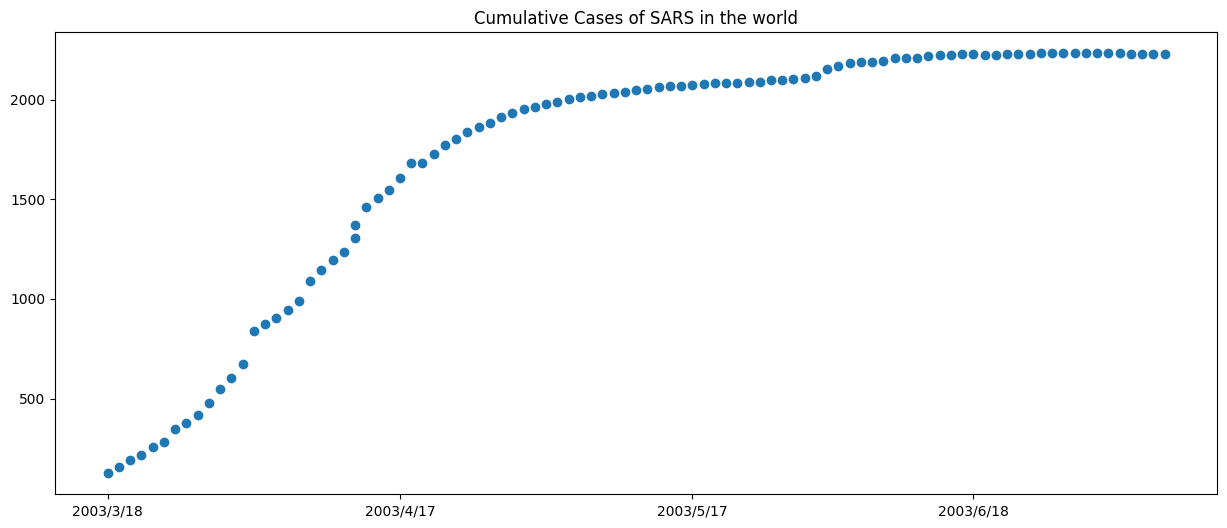

In [172]:
total_cases = []

# 96 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 96):
    
    sum = 0
    for j in country_96:
        sum = sum + locals()[str("{}".format(j)) + "Cumulative number of case(s)"][i]
    
    total_cases.append(sum)

time = locals()[str("{}".format("{}".format("China"))) + "_Date"]


rang = ["2003/3/18", "2003/4/17", "2003/5/17", "2003/6/18"]

plt.figure(figsize = (15, 6))
plt.title("Cumulative Cases of SARS in the world")
plt.scatter(time, total_cases)
plt.xticks(rang)
plt.show()

### 各國總確診人數 Zip's Law (國家排名對確診人數的 Zip's Law)

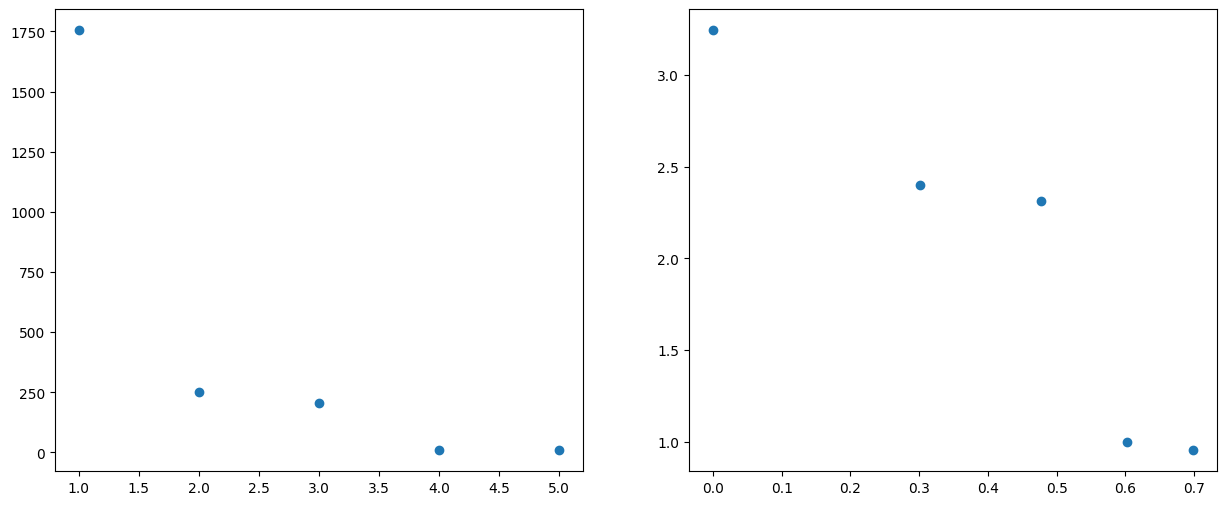

In [173]:
country_total = []
for i in country_96:
    country_total.append(locals()[str("{}".format(i)) + "Cumulative number of case(s)"][-1])

# count = []
# cate = list(set(country_total))
# for i in range(0, len(cate)):
#     count.append(co.Counter(country_total)[cate[i]])
# count = sorted(count, reverse = True) #由大到小排列
count = sorted(country_total, reverse = True) #由大到小排列
x = np.linspace(1, len(count), len(count))

log_count = []
log_x = []
for j in range(len(count)):
    log_count.append(np.log10(count[j]))
    log_x.append(np.log10(x[j]))

plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.scatter(x, count)
plt.subplot(122)
plt.scatter(log_x, log_count)
plt.show()

## 全球的新增人口

### 新增人口 Zip's law (新增人口排名對新增人口的 Zip's law)

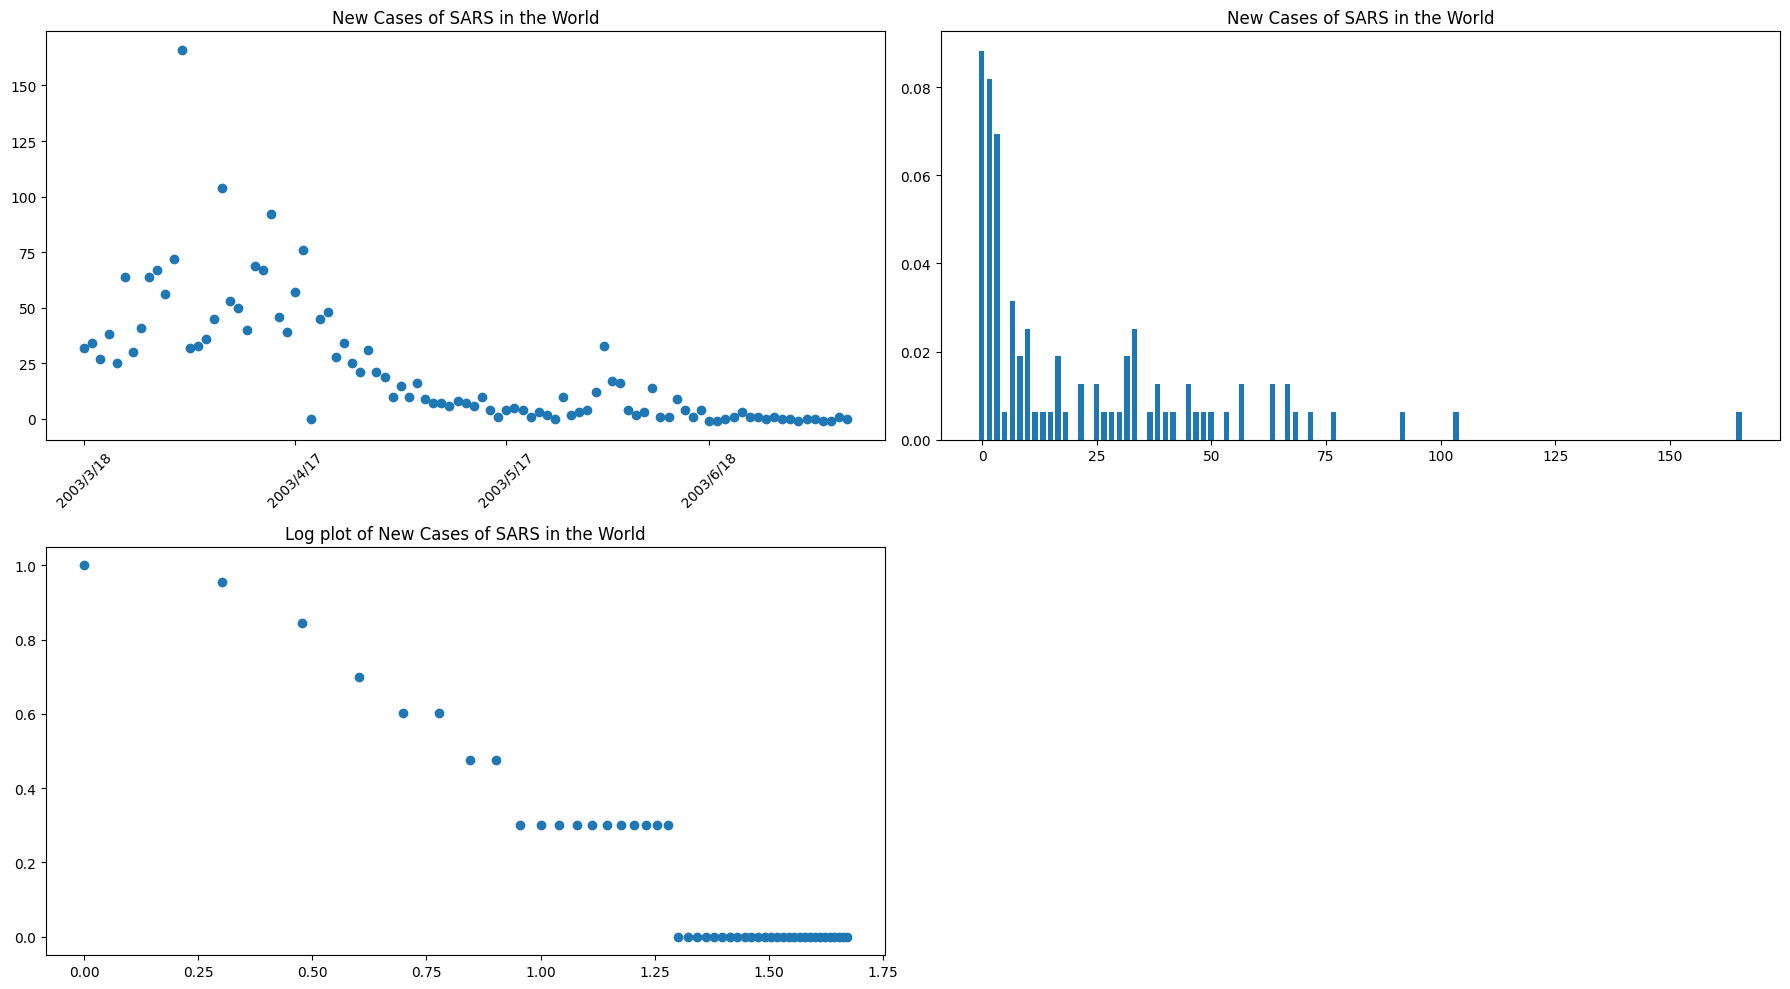

In [174]:
Cumulative_total_cases = []
total_cases = []

# 96 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 96):
    
    sum = 0
    for j in country_96:
        sum = sum + locals()[str("{}".format(j)) + "Cumulative number of case(s)"][i]
    
    Cumulative_total_cases.append(sum)

for i in range(0, len(Cumulative_total_cases)-1):
    total_cases.append(Cumulative_total_cases[i+1] - Cumulative_total_cases[i])


time = locals()[str("{}".format("{}".format("Canada"))) + "_Date"][1:]

total_cases_rate = total_cases


rang = ["2003/3/18", "2003/4/17", "2003/5/17", "2003/6/18"]
plt.figure(figsize = (18, 10))
plt.subplot(221)
plt.title("New Cases of SARS in the World")
plt.scatter(time, total_cases_rate)
plt.xticks(rang, rotation = 45)

######################################################################

count = []
cate = list(set(total_cases_rate))
for i in range(0, len(cate)):
    count.append(co.Counter(total_cases_rate)[cate[i]])
count = sorted(count, reverse = True) #由大到小排列
x = np.linspace(1, len(count), len(count))


log_count = []
log_x = []
for j in range(len(count)):
    log_count.append(np.log10(count[j]))
    log_x.append(np.log10(x[j]))

plt.subplot(222)
plt.hist(total_cases_rate, bins = 100, density = True, rwidth = 0.7)
plt.title("New Cases of SARS in the World")

####################################################################

plt.subplot(223)
plt.title("Log plot of New Cases of SARS in the World")
plt.scatter(log_x, log_count)

plt.tight_layout()


### 新增人口 DFA

<Figure size 800x600 with 0 Axes>

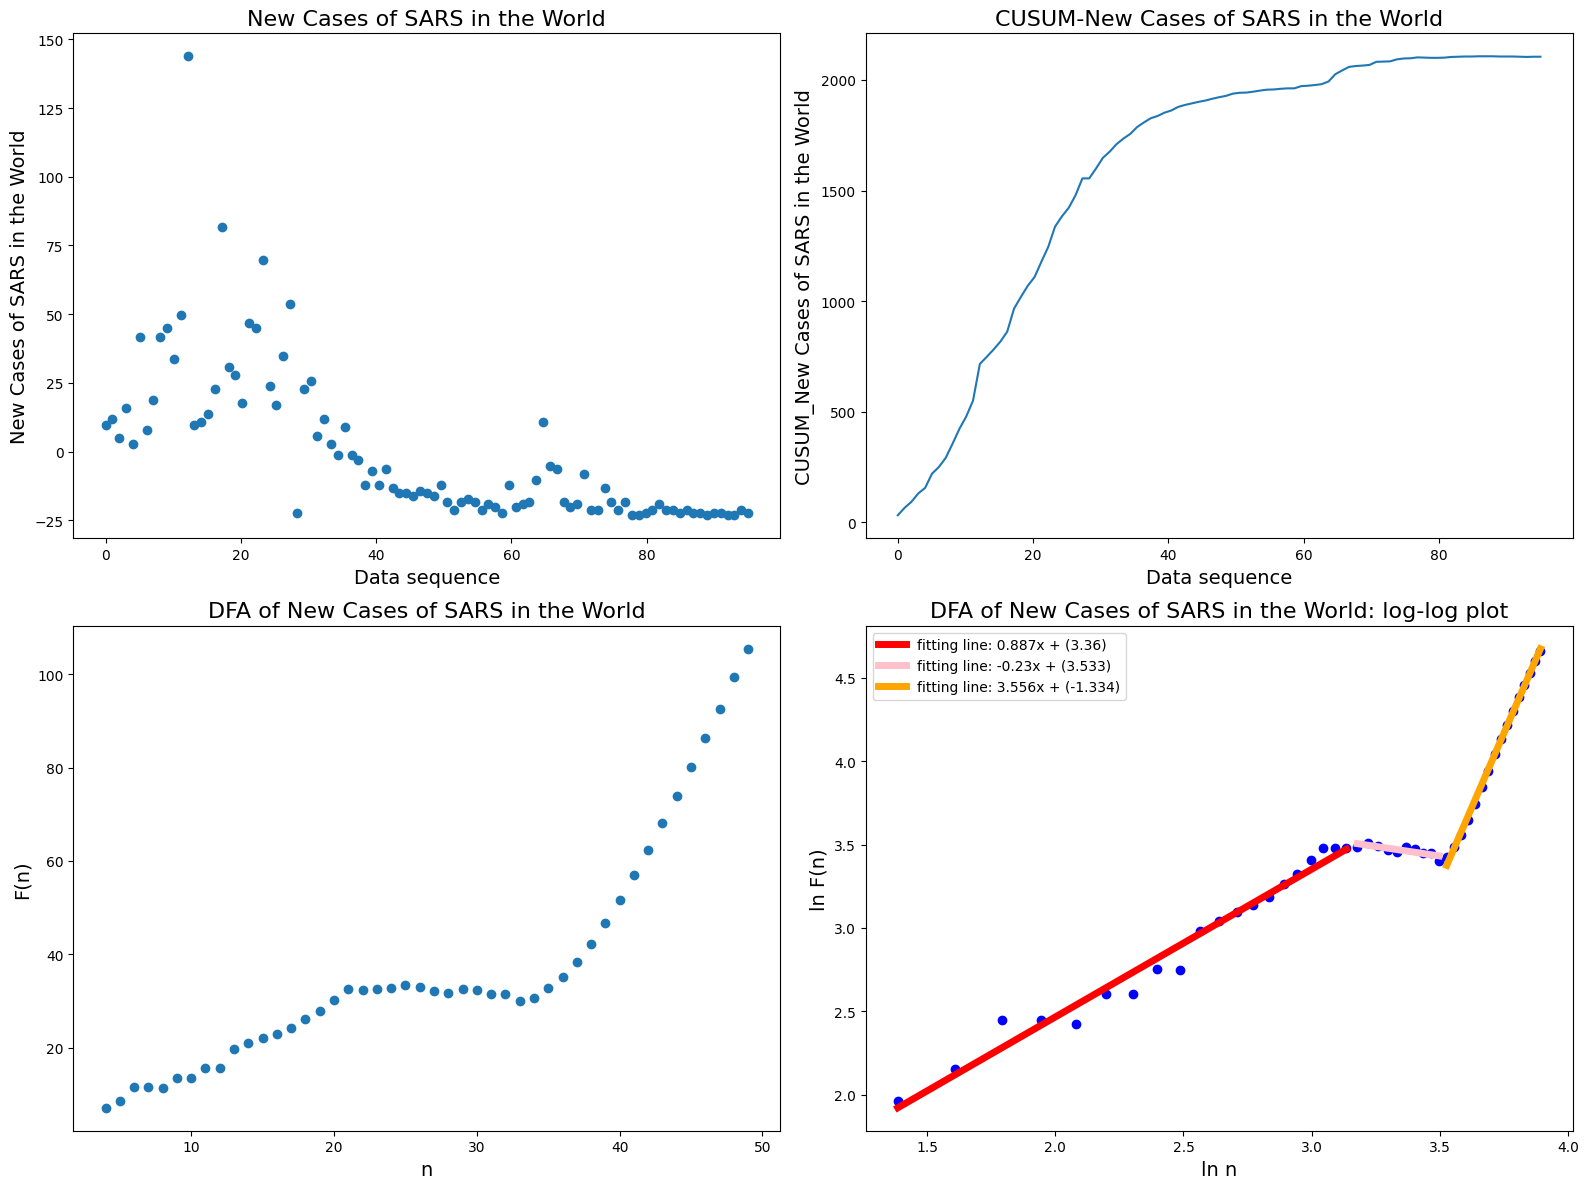

In [175]:
raw_data_y = total_cases_rate
raw_data_x = np.linspace(0, len(total_cases_rate), len(total_cases_rate))

size = []
for i in range(4, 50, 1):
    size.append(i)


def line_function(x, a, b):
    return a*x + b

# mean-centered cumulative sum

ave = [np.mean(raw_data_y)]*len(raw_data_y)
CUM = np.array(raw_data_y) - np.array(ave)

CUSUM = np.cumsum(raw_data_y)
####################################################################
def lin_function(x, a, b):
    return a*(x) + b

Fn_array = []
boundary = len(CUSUM)

for i in size:
    Fn_power = []
    for j in range(0, boundary, i-1):
        div_y = CUSUM[j:j+i]
        div_x = raw_data_x[j:j+i]

        if (len(div_y) < 3):
            break
        
        else:
            x0 = div_x
            y0 = div_y
            # print(type((div_y[-1] - div_y[0])), (div_y[-1] - div_y[0]))
            # print(type(div_x[-1]))
            fitt=( (div_y[-1] - div_y[0])/(div_x[-1] - div_x[0]), div_y[0])
            popt,pcov= curve_fit(lin_function, x0, y0, p0=fitt)

            for k in range(len(x0)):
                value = ( y0[k] - lin_function(x0[k], *popt) )**2
                Fn_power.append(value)
    
    Fn = np.sqrt( np.mean(Fn_power) )
    Fn_array.append(Fn)
######################################################################
log_Fn_array = []
log_size = []
for i in range(len(size)):
    log_size.append(np.log(size[i]))
    log_Fn_array.append(np.log(Fn_array[i]))

plt.figure(figsize = (8, 6))


######################################################################
plt.figure(figsize = (16, 12))
plt.subplot(221)
plt.title("New Cases of SARS in the World", fontsize = 16)
plt.xlabel("Data sequence", fontsize = 14)
plt.ylabel("New Cases of SARS in the World", fontsize = 14)
plt.scatter(raw_data_x, CUM)

plt.subplot(222)
plt.title("CUSUM-New Cases of SARS in the World", fontsize = 16)
plt.xlabel("Data sequence", fontsize = 14)
plt.ylabel("CUSUM_New Cases of SARS in the World", fontsize = 14)
plt.plot(raw_data_x, CUSUM)

plt.subplot(223)
plt.title("DFA of New Cases of SARS in the World", fontsize = 16)
plt.xlabel('n', fontsize = 14)
plt.ylabel('F(n)', fontsize = 14)
plt.scatter(size, Fn_array)

plt.subplot(224)
plt.title("DFA of New Cases of SARS in the World: log-log plot", fontsize = 16)
def lin_function_2(x, a, b, c):
    return a*(x + b) + c

x0 = log_size[0:20]
y0 = log_Fn_array[0:20]
fitt=( 0.5, -0.5 , -1)
popt2,pcov2= curve_fit(lin_function_2, x0, y0, p0=fitt)
popt2 = np.around(popt2, 3)
plt.scatter(log_size, log_Fn_array, color = "b")
plt.plot(x0, 
        lin_function_2(x0,*popt2),
        color="red", 
        label="fitting line: {}x + ({})".format(*popt2),
        linewidth = 5)

x0 = log_size[20:30]
y0 = log_Fn_array[20:30]
fitt=( 0.5, -0.5 , -1)
popt2,pcov2= curve_fit(lin_function_2, x0, y0, p0=fitt)
popt2 = np.around(popt2, 3)

plt.plot(x0, 
        lin_function_2(x0,*popt2),
        color="pink", 
        label="fitting line: {}x + ({})".format(*popt2),
        linewidth = 5)

x0 = log_size[30:]
y0 = log_Fn_array[30:]
fitt=( 0.5, -0.5 , -1)
popt2,pcov2= curve_fit(lin_function_2, x0, y0, p0=fitt)
popt2 = np.around(popt2, 3)

plt.plot(x0, 
        lin_function_2(x0,*popt2),
        color="orange", 
        label="fitting line: {}x + ({})".format(*popt2),
        linewidth = 5)

plt.xlabel('ln n', fontsize = 14)
plt.ylabel('ln F(n)', fontsize = 14)
plt.legend(loc = 'best')
plt.tight_layout()
# plt.savefig('DFA of New Cases of SARS in the World_3 fitting.png')
plt.show()

## 全球新增人口比率

[32, 34, 27, 38, 25, 64, 30, 41, 64, 67, 56, 72, 166, 32, 33, 36, 45, 104, 53, 50, 40, 69, 67, 92, 46, 39, 57, 76, 0, 45, 48, 28, 34, 25, 21, 31, 21, 19, 10, 15, 10, 16, 9, 7, 7, 6, 8, 7, 6, 10, 4, 1, 4, 5, 4, 1, 3, 2, 0, 10, 2, 3, 4, 12, 33, 17, 16, 4, 2, 3, 14, 1, 1, 9, 4, 1, 4, -1, -1, 0, 1, 3, 1, 1, 0, 1, 0, 0, -1, 0, 0, -1, -1, 1, 0]


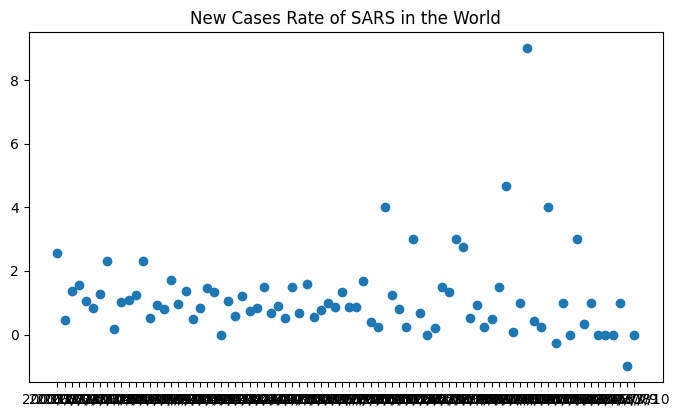

In [176]:
dig = 2
Cumulative_total_cases = []
total_cases = []

# 96 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 96):
    
    sum = 0
    for j in country_96:
        sum = sum + locals()[str("{}".format(j)) + "Cumulative number of case(s)"][i]
    
    Cumulative_total_cases.append(sum)

for i in range(0, len(Cumulative_total_cases)-1):
    total_cases.append(Cumulative_total_cases[i+1] - Cumulative_total_cases[i])

print(total_cases)
# time = locals()[str("{}".format("{}".format("Canada"))) + "_Date"][1:]

total_cases_rate = []
time = []
start = 5
for i in range(start, 96-1):
    if total_cases[i-1] == 0:
        pass
    else:
        time.append(locals()[str("{}".format("{}".format("Canada"))) + "_Date"][i])
        total_cases_rate.append( round(total_cases[i]/total_cases[i-1], dig) )

rang = ["2003/3/18", "2003/4/17", "2003/5/17", "2003/6/18"]

plt.figure(figsize = (18, 10))
plt.subplot(221)
plt.title("New Cases Rate of SARS in the World")
plt.scatter(time, total_cases_rate)
plt.show()

### 新增人口比率 Zip's law

[32, 34, 27, 38, 25, 64, 30, 41, 64, 67, 56, 72, 166, 32, 33, 36, 45, 104, 53, 50, 40, 69, 67, 92, 46, 39, 57, 76, 0, 45, 48, 28, 34, 25, 21, 31, 21, 19, 10, 15, 10, 16, 9, 7, 7, 6, 8, 7, 6, 10, 4, 1, 4, 5, 4, 1, 3, 2, 0, 10, 2, 3, 4, 12, 33, 17, 16, 4, 2, 3, 14, 1, 1, 9, 4, 1, 4, -1, -1, 0, 1, 3, 1, 1, 0, 1, 0, 0, -1, 0, 0, -1, -1, 1, 0]
[0.8450980400142568, 0.6989700043360189, 0.6020599913279624, 0.47712125471966244, 0.47712125471966244, 0.47712125471966244, 0.3010299956639812, 0.3010299956639812, 0.3010299956639812, 0.3010299956639812, 0.3010299956639812, 0.3010299956639812, 0.3010299956639812, 0.3010299956639812, 0.3010299956639812, 0.3010299956639812, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.79882052 1.94773473]
[0.03586604 0.09940374]


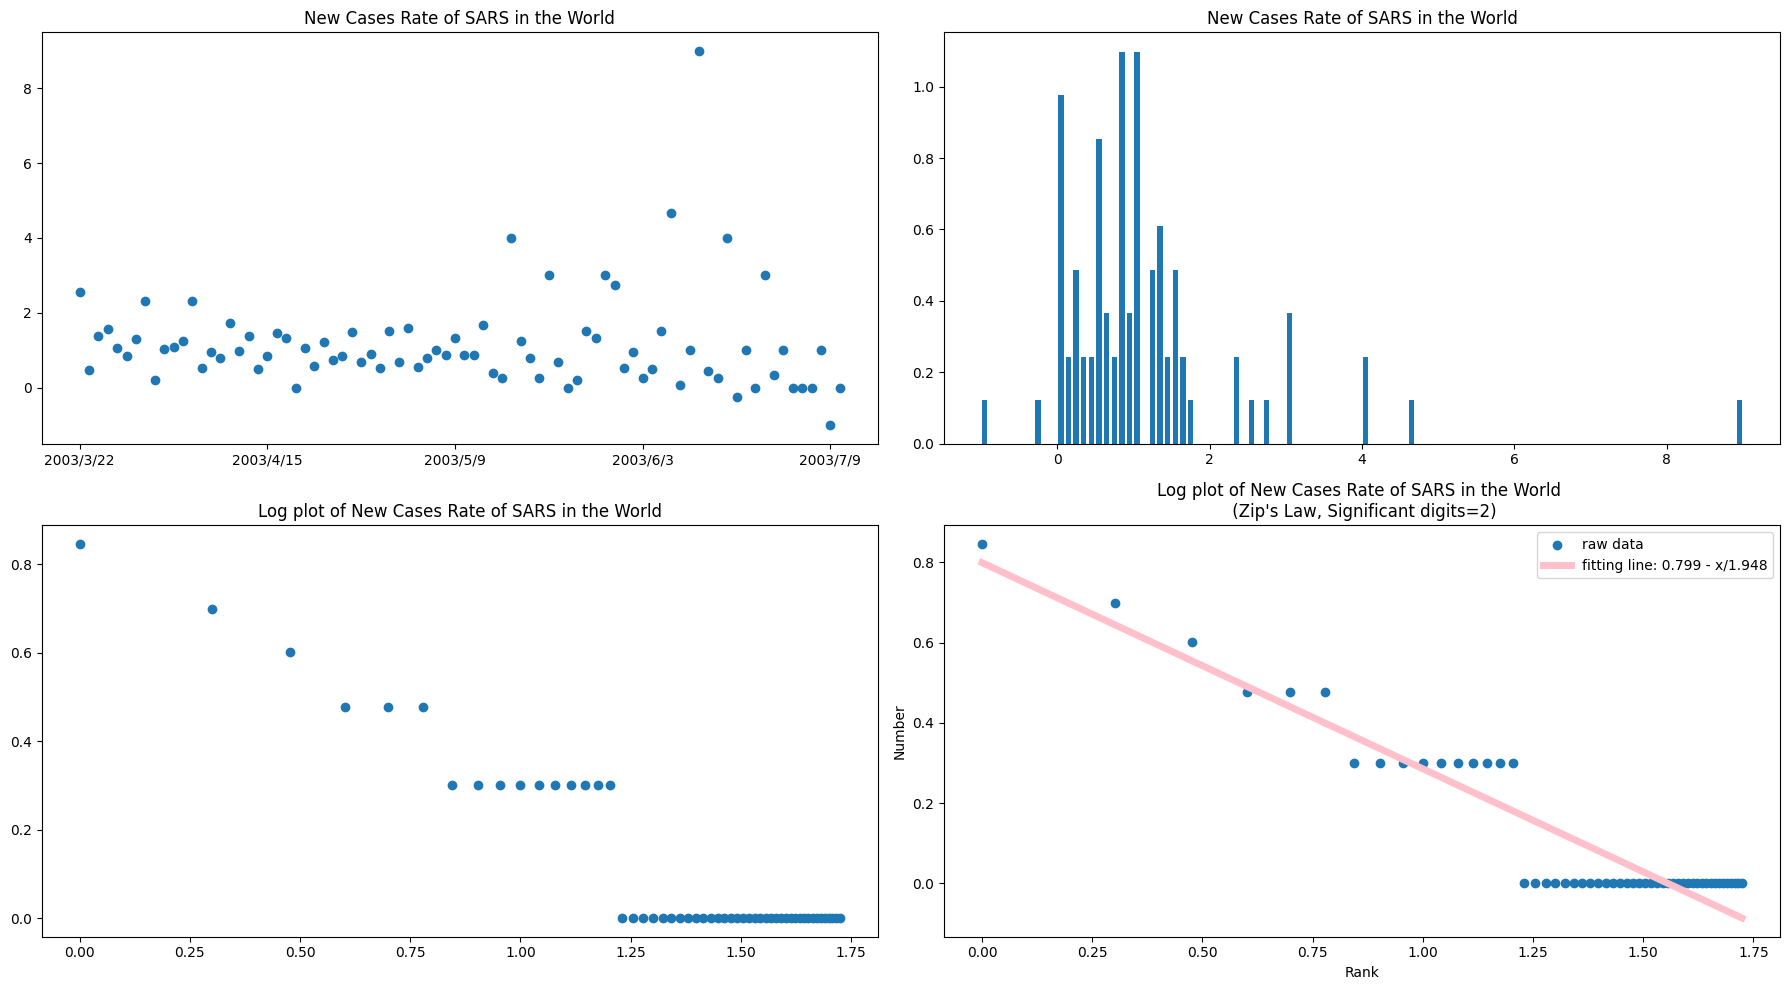

In [177]:
dig = 2
Cumulative_total_cases = []
total_cases = []

# 96 是總天數 (2020/01/03 - 2022/04/26)
for i in range(0, 96):
    
    sum = 0
    for j in country_96:
        sum = sum + locals()[str("{}".format(j)) + "Cumulative number of case(s)"][i]
    
    Cumulative_total_cases.append(sum)

for i in range(0, len(Cumulative_total_cases)-1):
    total_cases.append(Cumulative_total_cases[i+1] - Cumulative_total_cases[i])

print(total_cases)
# time = locals()[str("{}".format("{}".format("Canada"))) + "_Date"][1:]

total_cases_rate = []
time = []
start = 5
for i in range(start, 96-1):
    if total_cases[i-1] == 0:
        pass
    else:
        time.append(locals()[str("{}".format("{}".format("Canada"))) + "_Date"][i])
        total_cases_rate.append( round(total_cases[i]/total_cases[i-1], dig) )

rang = ["2003/3/18", "2003/4/17", "2003/5/17", "2003/6/18"]

plt.figure(figsize = (18, 10))
plt.subplot(221)
plt.title("New Cases Rate of SARS in the World")
plt.scatter(time, total_cases_rate)
plt.xticks(ticks = time[::20])

######################################################################

# count = pd.value_counts(total_cases_rate)
# count = list(count)

count = []
cate = list(set(total_cases_rate))
for i in range(0, len(cate)):
    count.append(co.Counter(total_cases_rate)[cate[i]])
count = sorted(count, reverse = True) #由大到小排列
x = np.linspace(1, len(count), len(count))

# print(count)
# print(total_cases_rate)

log_count = []
log_x = []
for j in range(len(count)):
    log_count.append(np.log10(count[j]))
    log_x.append(np.log10(x[j]))

# log_count.remove(log_count[0])
# log_x.remove(log_x[0])

plt.subplot(222)
plt.hist(total_cases_rate, bins = 100, density = True, rwidth = 0.7)
plt.title("New Cases Rate of SARS in the World")
# plt.xlim(0, 2)

####################################################################

plt.subplot(223)
plt.title("Log plot of New Cases Rate of SARS in the World")
plt.scatter(log_x, log_count)

##########################################################################

# FITTING

plt.subplot(224)

plt.scatter(log_x, log_count, label="raw data")
x0 = log_x
y0 = log_count
print(y0)
# x0 = log_x
# y0 = log_count

def function(x, c, a):
    return c - x/a
fitt=(-0.64, 0.5) # 猜 x = 1, y = 2*pi
popt,pcov= curve_fit(function, x0, y0, p0=fitt)
perr=np.sqrt(np.diag(pcov))
print(popt)
popt = np.round(popt, 3)
#print(pcov)
print(perr)

plt.title("Log plot of New Cases Rate of SARS in the World \n (Zip's Law, Significant digits={})".format(dig))
plt.plot(x0, 
        function(np.array(x0), *popt),
        color="pink", 
        label="fitting line: {} - x/{}".format(*popt),
        linewidth = 5)


plt.xlabel("Rank")
plt.ylabel("Number")
plt.legend(loc = 'upper right')

plt.tight_layout()
# plt.savefig("New Cases Rate of SARS in the World_1 fitting (Zip's Law, digits={}).PNG".format(dig))
plt.show()

### 新增人口比率DFA

<Figure size 800x600 with 0 Axes>

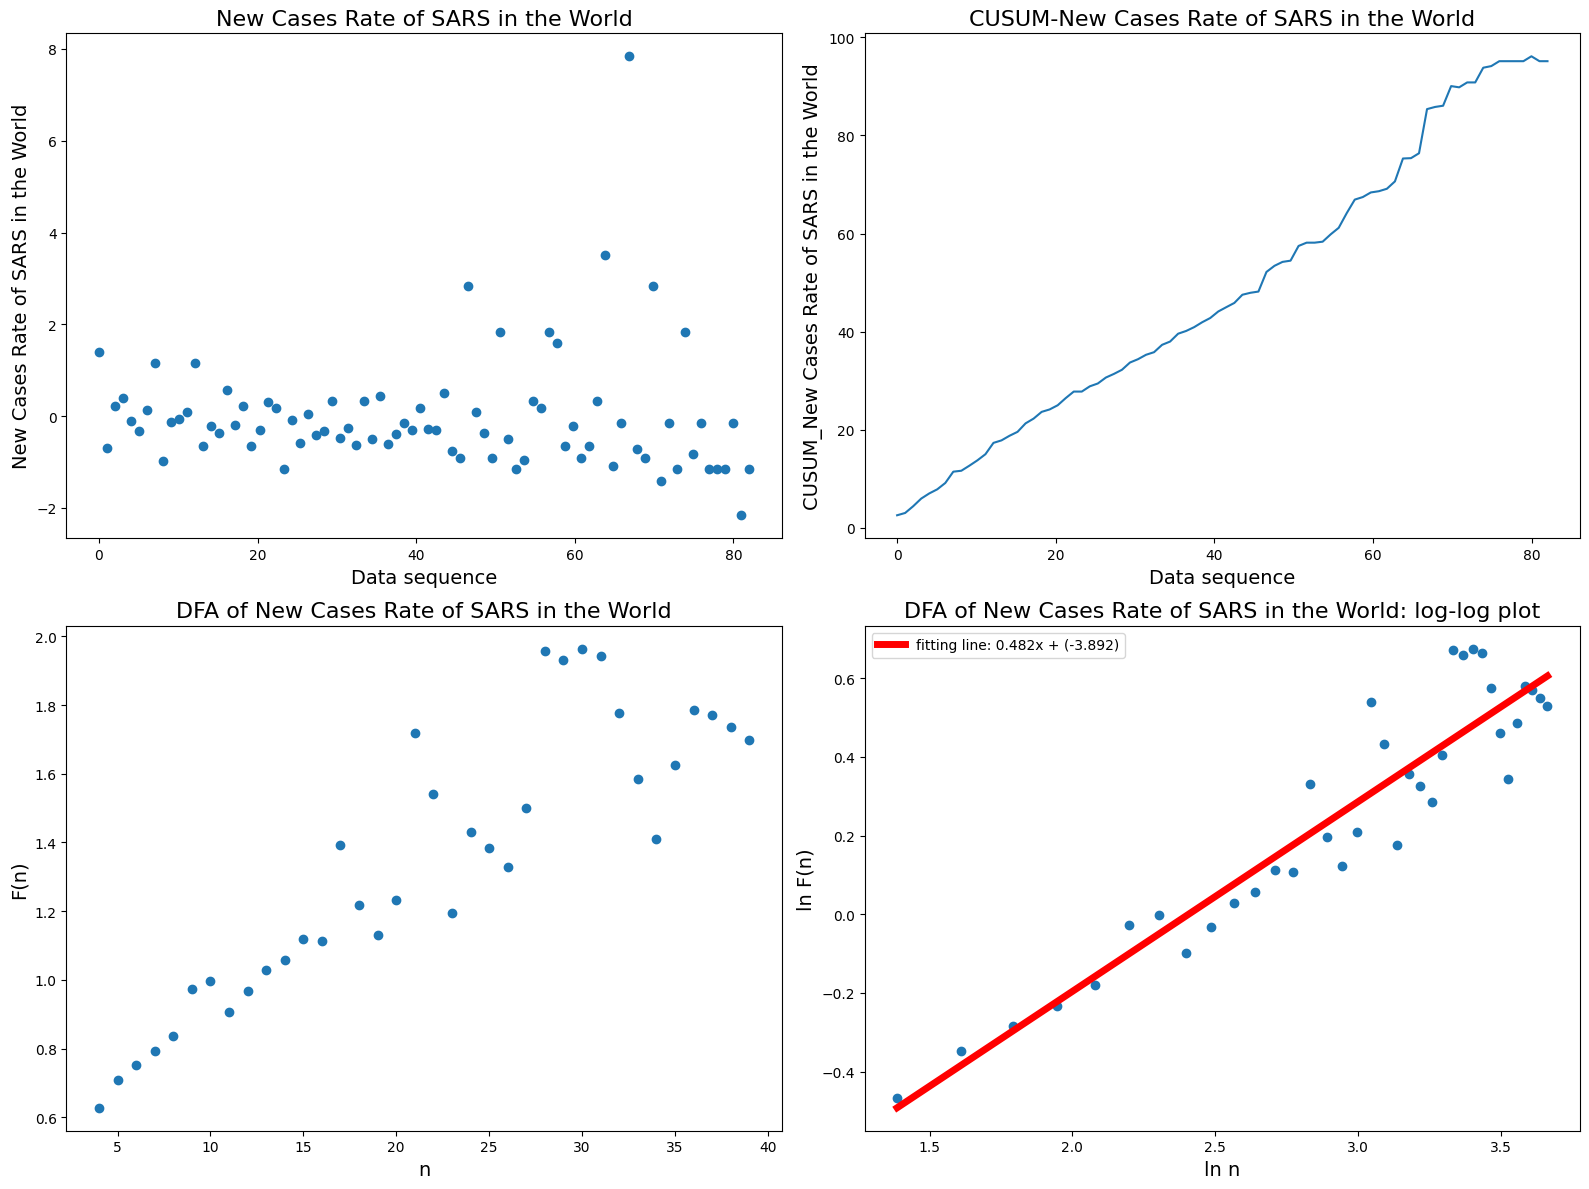

In [178]:
raw_data_y = total_cases_rate
raw_data_x = np.linspace(0, len(total_cases_rate), len(total_cases_rate))

size = []
for i in range(4, 40, 1):
    size.append(i)

def line_function(x, a, b):
    return a*x + b

# mean-centered cumulative sum

ave = [np.mean(raw_data_y)]*len(raw_data_y)
CUM = np.array(raw_data_y) - np.array(ave)

CUSUM = np.cumsum(raw_data_y)
####################################################################
def lin_function(x, a, b):
    return a*(x) + b

Fn_array = []
boundary = len(CUSUM)

for i in size:
    Fn_power = []
    for j in range(0, boundary, i-1):
        div_y = CUSUM[j:j+i]
        div_x = raw_data_x[j:j+i]

        if (len(div_y) < 3):
            break
        
        else:
            x0 = div_x
            y0 = div_y
            # print(type((div_y[-1] - div_y[0])), (div_y[-1] - div_y[0]))
            # print(type(div_x[-1]))
            fitt=( (div_y[-1] - div_y[0])/(div_x[-1] - div_x[0]), div_y[0])
            popt,pcov= curve_fit(lin_function, x0, y0, p0=fitt)

            for k in range(len(x0)):
                value = ( y0[k] - lin_function(x0[k], *popt) )**2
                Fn_power.append(value)
    
    Fn = np.sqrt( np.mean(Fn_power) )
    Fn_array.append(Fn)
######################################################################
log_Fn_array = []
log_size = []
for i in range(len(size)):
    log_size.append(np.log(size[i]))
    log_Fn_array.append(np.log(Fn_array[i]))

plt.figure(figsize = (8, 6))


######################################################################
plt.figure(figsize = (16, 12))
plt.subplot(221)
plt.title("New Cases Rate of SARS in the World", fontsize = 16)
plt.xlabel("Data sequence", fontsize = 14)
plt.ylabel("New Cases Rate of SARS in the World", fontsize = 14)
plt.scatter(raw_data_x, CUM)

plt.subplot(222)
plt.title("CUSUM-New Cases Rate of SARS in the World", fontsize = 16)
plt.xlabel("Data sequence", fontsize = 14)
plt.ylabel("CUSUM_New Cases Rate of SARS in the World", fontsize = 14)
plt.plot(raw_data_x, CUSUM)

plt.subplot(223)
plt.title("DFA of New Cases Rate of SARS in the World", fontsize = 16)
plt.xlabel('n', fontsize = 14)
plt.ylabel('F(n)', fontsize = 14)
plt.scatter(size, Fn_array)

plt.subplot(224)
plt.title("DFA of New Cases Rate of SARS in the World: log-log plot", fontsize = 16)
def lin_function_2(x, a, b, c):
    return a*(x + b) + c

x0 = log_size
y0 = log_Fn_array
fitt=( 0.5, -0.5 , -1)
popt2,pcov2= curve_fit(lin_function_2, x0, y0, p0=fitt)
popt2 = np.around(popt2, 3)
plt.scatter(log_size, log_Fn_array)
plt.plot(x0, 
        lin_function_2(x0,*popt2),
        color="red", 
        label="fitting line: {}x + ({})".format(*popt2),
        linewidth = 5)

plt.xlabel('ln n', fontsize = 14)
plt.ylabel('ln F(n)', fontsize = 14)
plt.legend(loc = 'best')
plt.tight_layout()
# plt.savefig('DFA of New Cases Rate of SARS in the World_1 fitting.png')
plt.show()

### 新增人口比率Probability Density Function

82
82
[0.16780613 1.59502823]


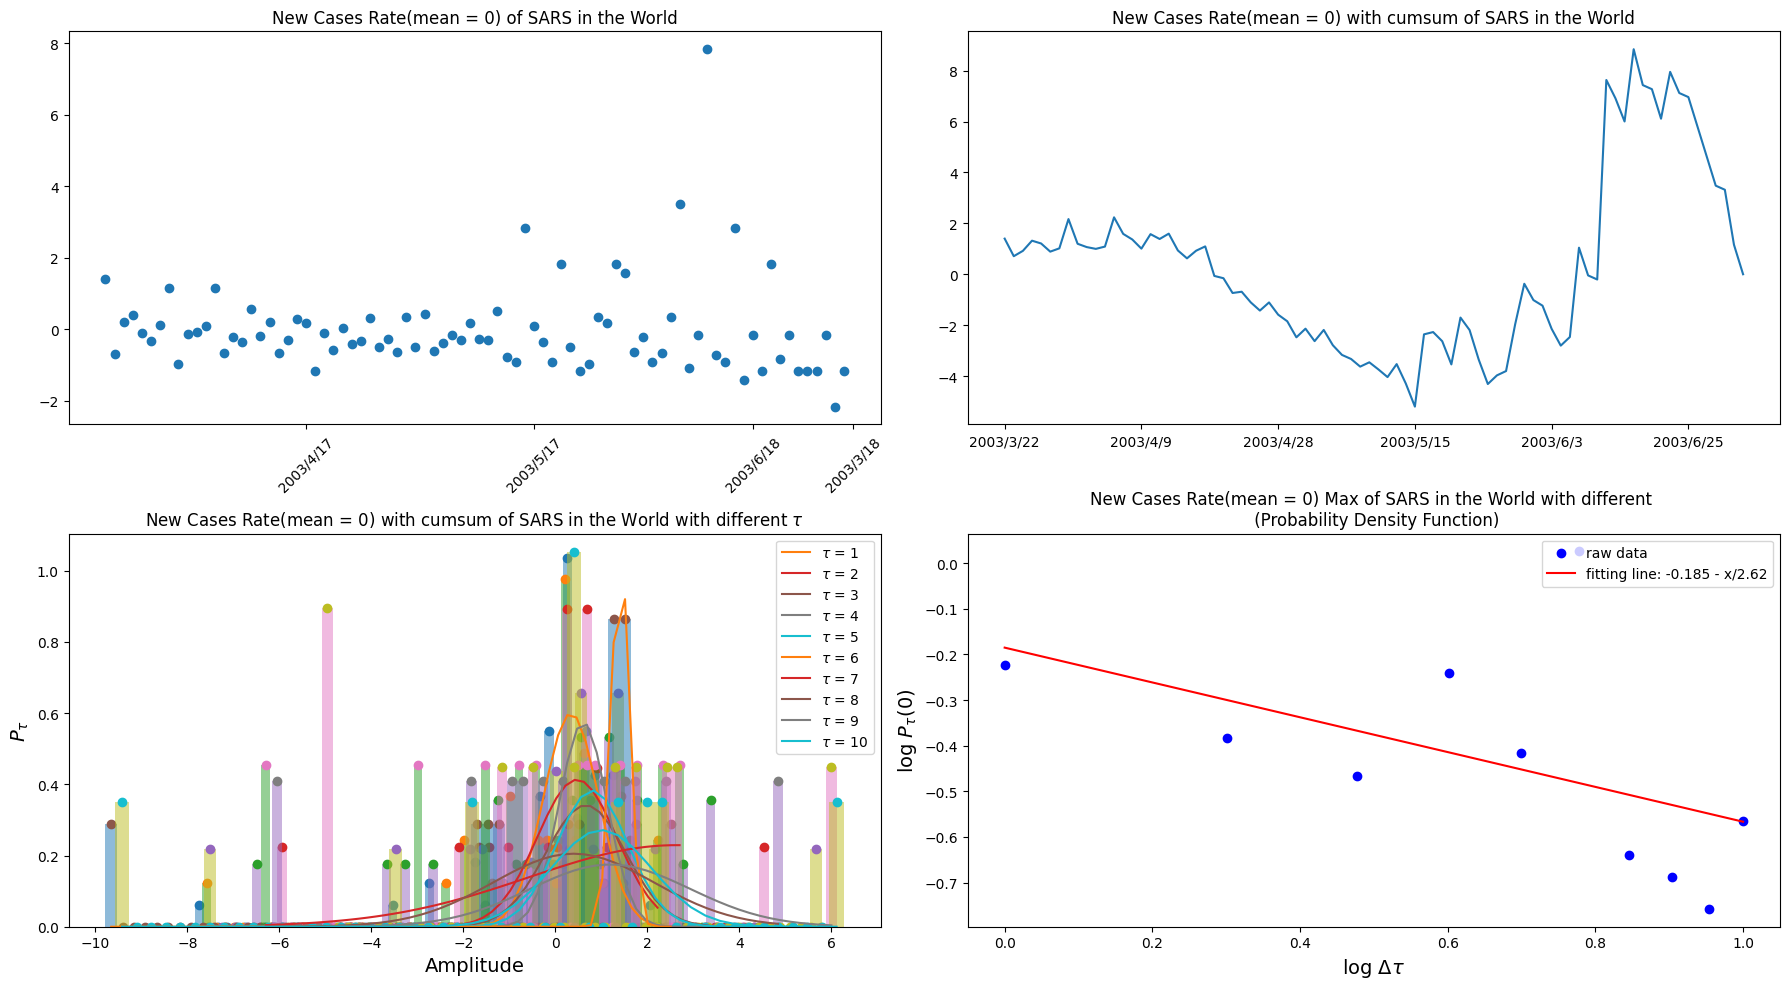

In [185]:
total_cases_rate_mean = np.array(total_cases_rate) - np.mean(total_cases_rate)

p_raw_data = np.cumsum(total_cases_rate_mean)
x = time

print(len(x))
print(len(total_cases_rate_mean))

plt.figure(figsize = (18, 10))
plt.subplot(221)
plt.title("New Cases Rate(mean = 0) of SARS in the World")
plt.scatter(x, total_cases_rate_mean)
plt.xticks(rang, rotation = 45)

plt.subplot(222)
plt.title("New Cases Rate(mean = 0) with cumsum of SARS in the World")
# plt.xlabel("t", fontsize = "14")
# plt.ylabel("Position", fontsize = "14")
plt.plot(x, p_raw_data)
plt.xticks(ticks = time[::15])

#################################################################################

# 設定取樣頻率
# 設定變數
# size = [1, 2, 4, 8, 16, 32]
size = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for j in size:
    locals()["data_" + str(j) + "_tr"] = []
    locals()["data_" + str(j)] = [] # 取樣後的震盪圖
    

    locals()["data_" + str(j) + "_tr"] = p_raw_data[0:len(p_raw_data):j] # 把原始資料累加的結果取樣

    locals()["data_" + str(j)].append( locals()["data_" + str(j) + "_tr"][0] )

    # 把原始資料累加的結果取樣重新畫回震盪圖
    for i in range(len(locals()["data_" + str(j) + "_tr"])-1):
        locals()["data_" + str(j)].append( locals()["data_" + str(j) + "_tr"][i] - locals()["data_" + str(j) + "_tr"][i+1])
        
####################################################################################################################################################

def g_function(x, A, sigma, mu):
    return A*(np.e**(-((x-mu)**2) / (2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

# def g_function(x, A, sigma):
#     return A*(np.e**(-((x)**2) / (2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

plt.subplot(223)
test = []
Max = []

for j in size:
    
    locals()["data_" + str(j) + "_n"], locals()["data_" + str(j) + "_h_bins"], patches = plt.hist(
                                                                                    locals()["data_" + str(j)],  
                                                                                    density = True, 
                                                                                    alpha = 0.5,
                                                                                    bins = 50
                                                                                    )
    
    mid_bins = []
    for i in range( len(locals()["data_" + str(j) + "_h_bins"])-1 ):
        mid_bins.append( (locals()["data_" + str(j) + "_h_bins"][i] + locals()["data_" + str(j) + "_h_bins"][i+1])/2 )

    plt.scatter( mid_bins, locals()["data_" + str(j) + "_n"] )

    locals()["data_" + str(j) + "_bins"] = []

    for i in range(0, len(locals()["data_" + str(j) + "_h_bins"])-1):
        locals()["data_" + str(j) + "_bins"].append( (locals()["data_" + str(j) + "_h_bins"][i] + locals()["data_" + str(j) + "_h_bins"][i+1])/2)
    
    #plt.scatter(locals()["data_" + str(j) + "_bins"], locals()["data_" + str(j) + "_n"])

    x0 = locals()["data_" + str(j) + "_bins"]
    y0 = locals()["data_" + str(j) + "_n"]

    fitt=(50000/j, 1, 0)
    # fitt=(50000/j, 1)

    popt,pcov= curve_fit(g_function, x0, y0, p0=fitt)
    # print(popt, g_function(popt[2],*popt))
    plt.title(r"New Cases Rate(mean = 0) with cumsum of SARS in the World with different $\tau$")
    plt.xlabel("Amplitude", fontsize = 14)
    plt.ylabel(r"$P_{\tau}$", fontsize = 14)
    plt.plot(x0, 
            g_function(x0,*popt), 
            label=r"$\tau$ = {}".format(j))
    plt.legend(loc = "best")

    Max.append(np.log10(g_function(popt[2],*popt)))
    test.append(np.log10(j))

###########################################################################################################

x0 = test
y0 = Max

def function(x, c, a):
    return c - x/a
fitt=(-0.4, 3.3) # 猜 x = 1, y = 2*pi
popt,pcov= curve_fit(function, x0, y0, p0=fitt)
perr=np.sqrt(np.diag(pcov))
popt = np.round(popt, 3)
#print(pcov)
print(perr)

plt.subplot(224)
plt.title("New Cases Rate(mean = 0) Max of SARS in the World with different \n (Probability Density Function)")
plt.scatter(x0, y0, color="blue", label="raw data")
plt.plot(x0, 
        function(np.array(x0), *popt),
        color="red", 
        label="fitting line: {} - x/{}".format(*popt))
plt.xlabel(r"log $\Delta$$\tau$", fontsize = 14)
plt.ylabel(r"log $P_{\tau}(0)$", fontsize = 14)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("New Cases Rate of SARS in the World (Probability Density Function).PNG")
